## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, skew, kurtosis
from sklearn.preprocessing import StandardScaler 

In [2]:
# Load data
data_path = 'Data/Raw/heart.csv'
df = pd.read_csv(data_path)

# Col names
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 
              'RestingECG', 'MaxHeartRate', 'ExerciseInducedAngina', 'STDepression', 'STSlope', 
              'NumMajorVessels', 'Thalassemia', 'HeartAttackRisk']

In [3]:
start = len(df)

df = df[df['NumMajorVessels'] < 4]  # Drop the wrong NumMajorVessels values
df = df[df['Thalassemia'] > 0]  # Drop the wrong Thalassemia values

df = df.reset_index(drop=True)  # Reset the index

print(f'The length of the data now is {len(df)} instead of {start}')

The length of the data now is 296 instead of 303


In [4]:
df = df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    296 non-null    float64
 1   Sex                    296 non-null    float64
 2   ChestPainType          296 non-null    float64
 3   RestingBloodPressure   296 non-null    float64
 4   Cholesterol            296 non-null    float64
 5   FastingBloodSugar      296 non-null    float64
 6   RestingECG             296 non-null    float64
 7   MaxHeartRate           296 non-null    float64
 8   ExerciseInducedAngina  296 non-null    float64
 9   STDepression           296 non-null    float64
 10  STSlope                296 non-null    float64
 11  NumMajorVessels        296 non-null    float64
 12  Thalassemia            296 non-null    float64
 13  HeartAttackRisk        296 non-null    float64
dtypes: float64(14)
memory usage: 32.5 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
Sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
ChestPainType,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
RestingBloodPressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
Cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
FastingBloodSugar,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
RestingECG,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
MaxHeartRate,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
ExerciseInducedAngina,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
STDepression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,STSlope,NumMajorVessels,Thalassemia,HeartAttackRisk
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


## EDA

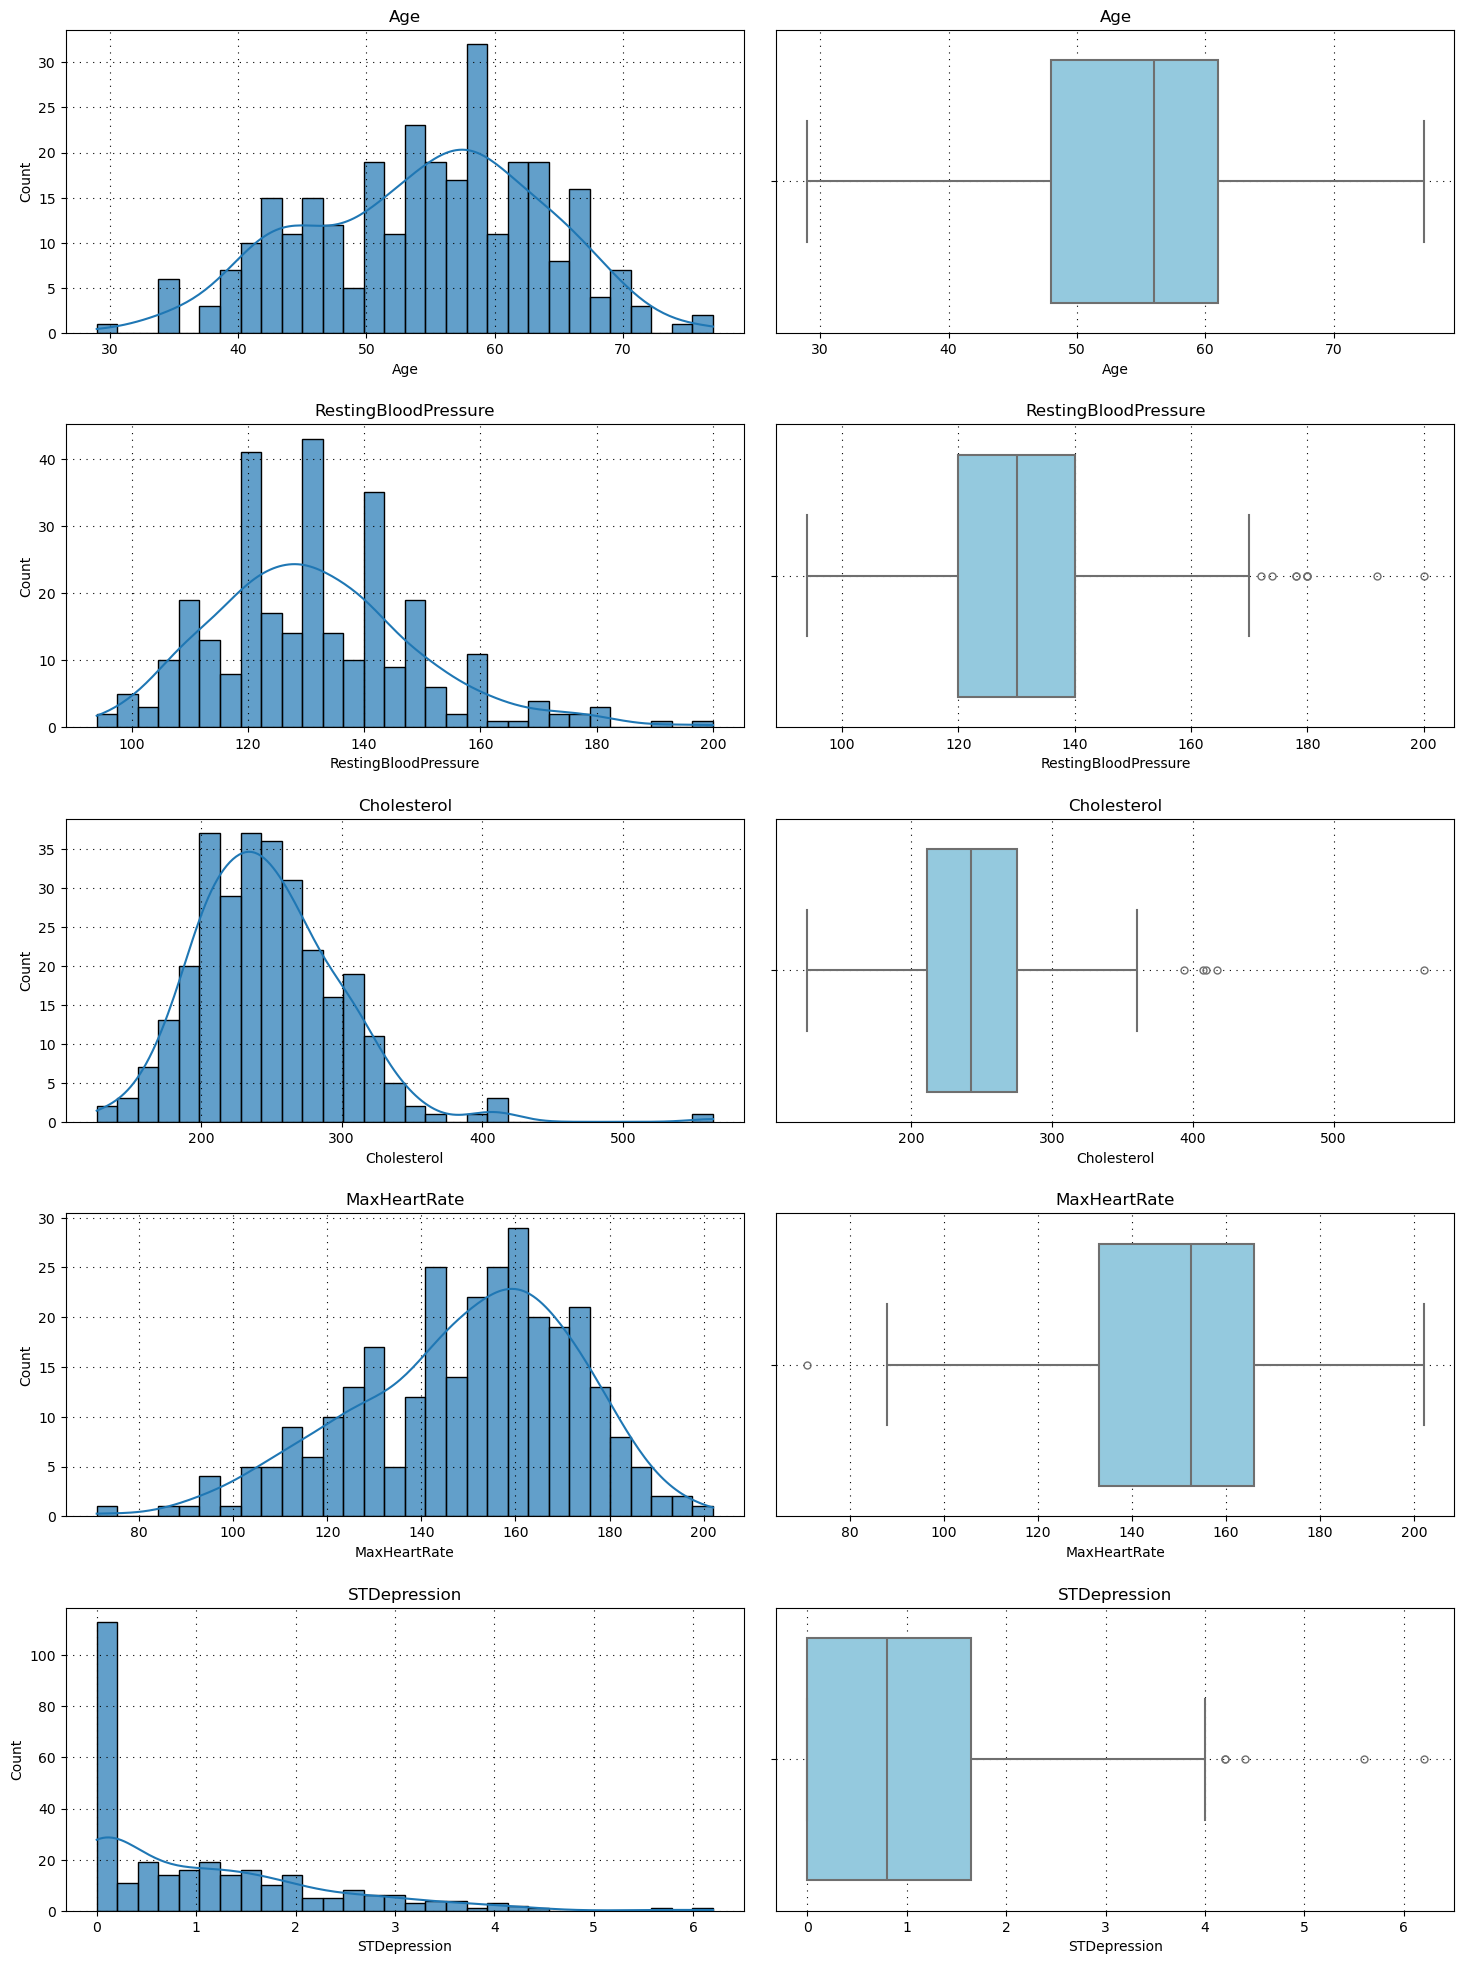

In [7]:
# Numerical columns
numerical_columns = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'STDepression']

plt.figure(figsize=(15, 20))

# Plots
for i, col in enumerate(numerical_columns):
    # Histogram
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.histplot(df[col], kde=True, bins=30, alpha=0.7)
    plt.grid(color='#000000', linestyle=':', zorder=0, dashes=(1,5))
    plt.title(f'{col}')

    # Boxplot
    plt.subplot(len(numerical_columns), 2, 2 * i + 2)
    sns.boxplot(x=df[col], color="skyblue", fliersize=5, linewidth=1.5)
    plt.grid(color='#000000', linestyle=':', zorder=0, dashes=(1,5))
    plt.title(f'{col}')

plt.tight_layout(pad=2.0)
plt.savefig("EDA/Histograms_and_Boxplots", dpi=1000)
plt.show()
plt.close()

In [8]:
# Distribution values

results = []

for col in numerical_columns:
    stat, p_value = shapiro(df[col])
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    
    results.append({
        'Column': col,
        'Shapiro-Wilk Statistic': stat,
        'p-value': p_value,
        'Skewness': skewness,
        'Kurtosis': kurt
    })

results_df = pd.DataFrame(results)
results_df

,Column,Shapiro-Wilk Statistic,p-value,Skewness,Kurtosis
0,Age,0.986155,6.044837e-03,-0.213325,-0.537590
1,RestingBloodPressure,0.965949,1.912894e-06,0.707152,0.822685
2,Cholesterol,0.947630,8.985581e-09,1.124171,4.397804
3,MaxHeartRate,0.976990,1.072688e-04,-0.528973,-0.079860
4,STDepression,0.849199,2.500522e-16,1.237241,1.457817


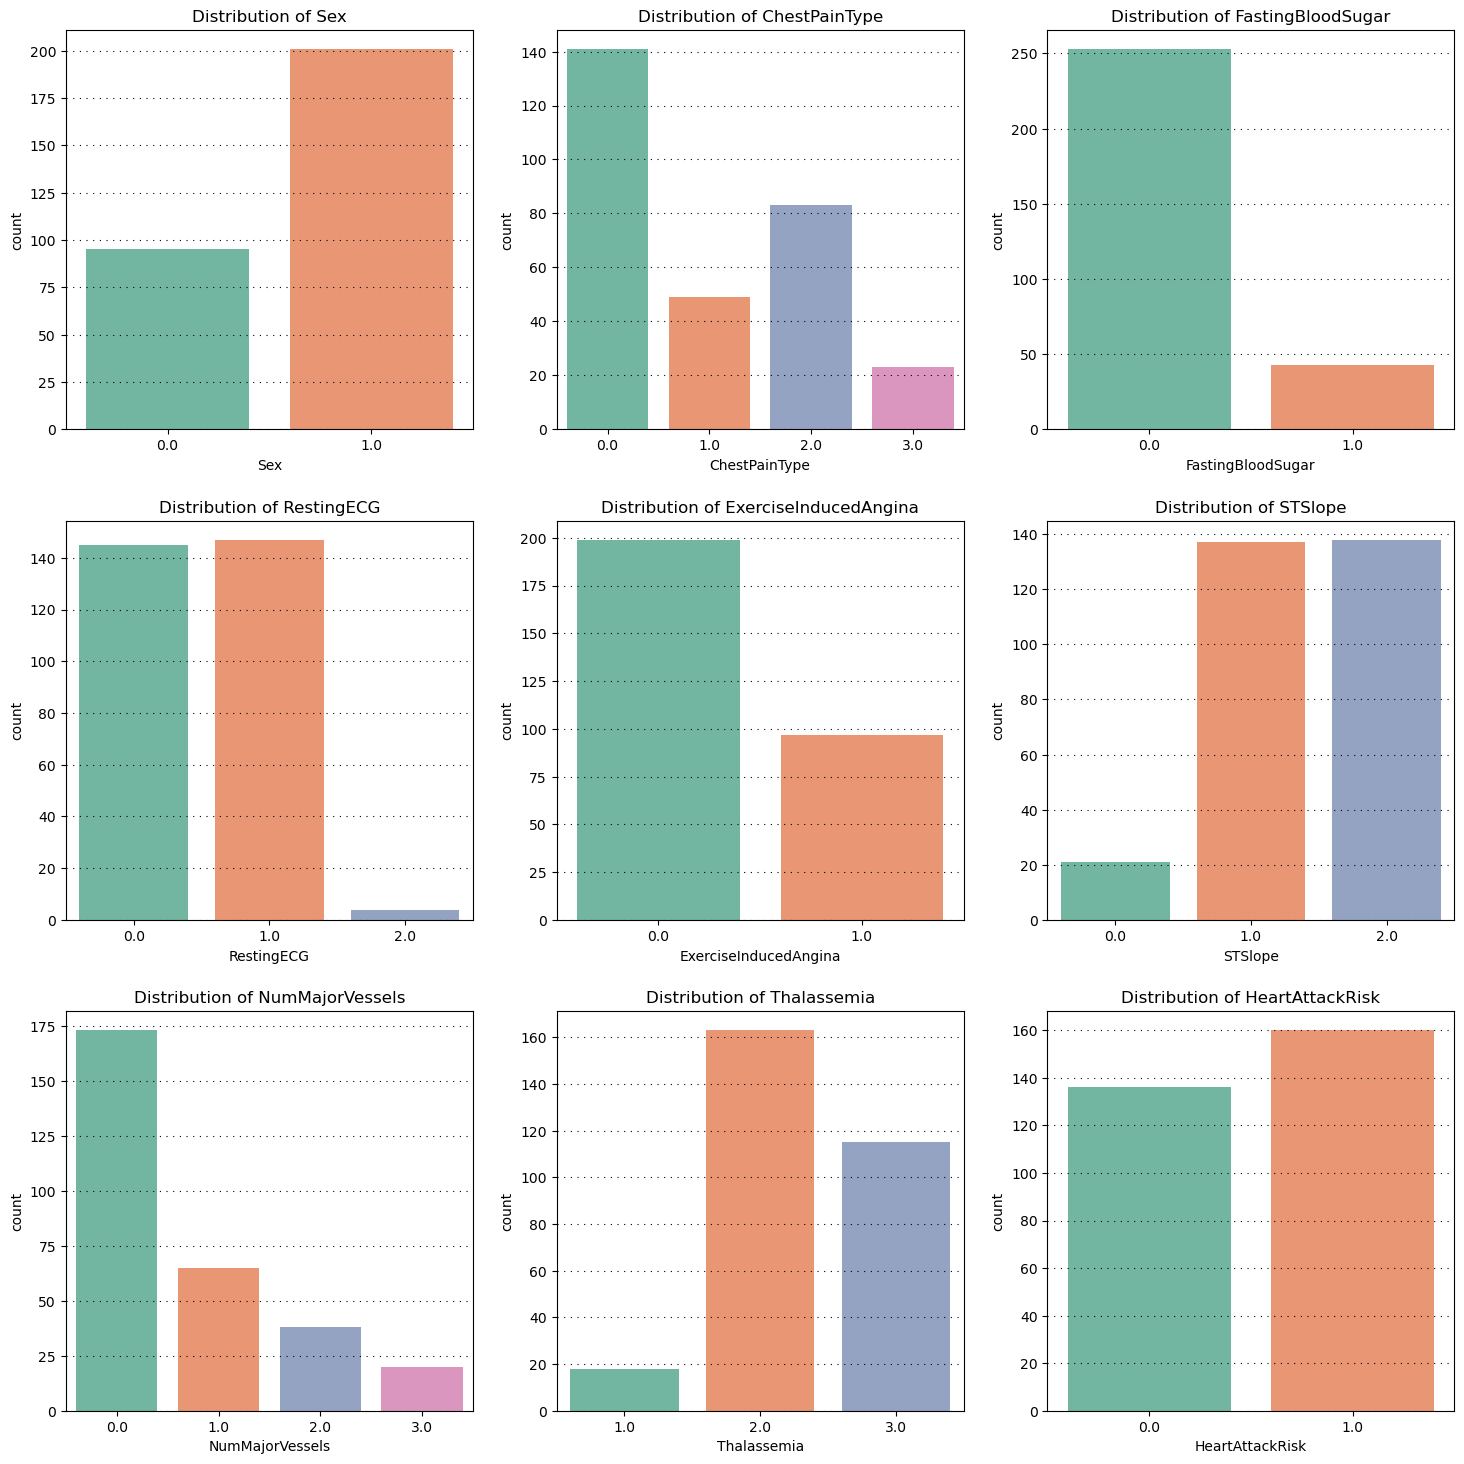

In [9]:
# Categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 
                       'ExerciseInducedAngina', 'STSlope', 'NumMajorVessels', 'Thalassemia', 'HeartAttackRisk']

plt.figure(figsize=(15, 15))

# Countplots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette='Set2', legend=False)
    plt.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    plt.title(f'Distribution of {col}')

plt.tight_layout(pad=2.0)
plt.savefig("EDA/Countplots", dpi=1000)
plt.show()
plt.close()

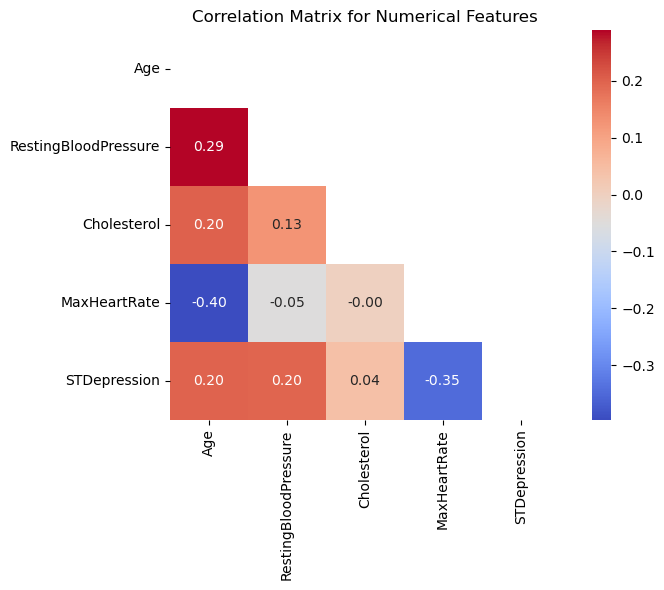

In [10]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlation Matrix for Numerical Features', fontsize=12)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("EDA/CorrMatrix", dpi=300)
plt.show()
plt.close()

<Figure size 2000x2000 with 0 Axes>

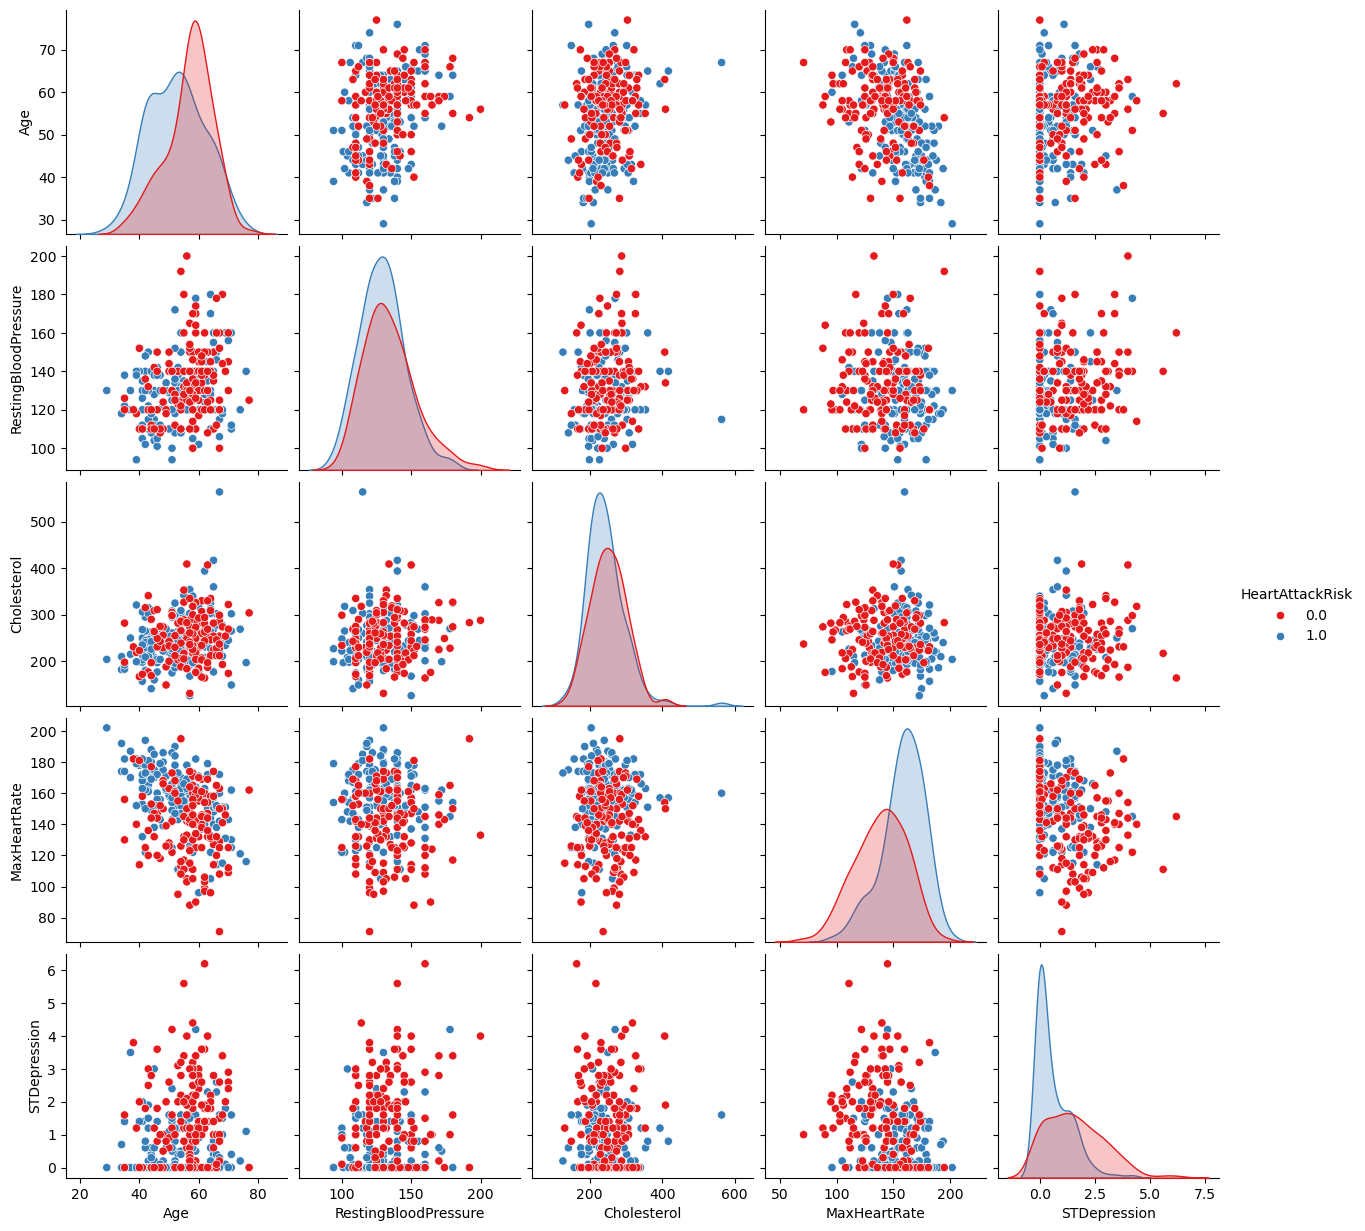

In [11]:
# Pairplots
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='HeartAttackRisk', vars=numerical_columns, palette='Set1')
plt.savefig("EDA/Pairplots", dpi=1000)
plt.show()
plt.close()

## Preprocess

In [12]:
X = df.drop(['HeartAttackRisk'], axis=1) 
y = df['HeartAttackRisk']

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.to_numpy()